In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

## 1. Hodgkin-Huxley model

#### a)

In [2]:
E_Na = 50
E_K = -77
E_leak = -54.387
g_Na = 120
g_K = 36
g_leak = 0.3

C_m = 1

def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))

def beta_m(V):
    return 4 * np.exp(-0.0556 * (V + 65))

def beta_h(V):
    return 1 / (1 + np.exp(-0.1 * (V + 35)))

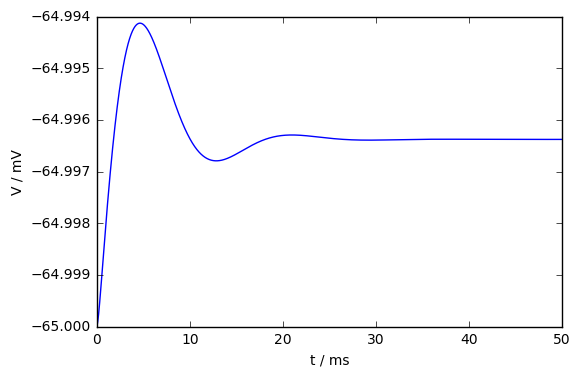

In [12]:
dt = 0.01
t = np.arange(0, 50, dt)

V = np.zeros_like(t)
n = np.zeros_like(t)
m = np.zeros_like(t)
h = np.zeros_like(t)

I_K = np.zeros_like(t)
I_Na = np.zeros_like(t)

V[0] = -65
m[0] = 0.0529
h[0] = 0.5961
n[0] = 0.3177

I_c = 0

for i in range(len(t)-1):
    I_Na[i] = g_Na * m[i]**3 * h[i] * (V[i] - E_Na)
    I_K[i] = g_K * n[i]**4 * (V[i] - E_K)
    I_leak = g_leak * (V[i] - E_leak)
    
    V[i+1] = V[i] + dt * (-I_Na[i] - I_K[i] - I_leak + I_c) / C_m
    m[i+1] = m[i] + dt * (alpha_m(V[i]) * (1 - m[i]) - beta_m(V[i]) * m[i])
    h[i+1] = h[i] + dt * (alpha_h(V[i]) * (1 - h[i]) - beta_h(V[i]) * h[i])
    n[i+1] = n[i] + dt * (alpha_n(V[i]) * (1 - n[i]) - beta_n(V[i]) * n[i])

plt.plot(t, V)
    
plt.xlabel(r't / ms')
plt.ylabel(r'V / mV')

plt.gca().ticklabel_format(useOffset=False)

#### b) 

In [53]:
dt = 0.01
t = np.arange(0, 50, dt)

V = np.zeros_like(t)
n = np.zeros_like(t)
m = np.zeros_like(t)
h = np.zeros_like(t)

I_K = np.zeros_like(t)
I_Na = np.zeros_like(t)

V[0] = -65
m[0] = 0.0529
h[0] = 0.5961
n[0] = 0.3177

I_c = 20

for i in range(len(t)-1):
    I_Na[i] = g_Na * m[i]**3 * h[i] * (V[i] - E_Na)
    I_K[i] = g_K * n[i]**4 * (V[i] - E_K)
    I_leak = g_leak * (V[i] - E_leak)
    
    V[i+1] = V[i] + dt * (-I_Na[i] - I_K[i] - I_leak + I_c) / C_m
    m[i+1] = m[i] + dt * (alpha_m(V[i]) * (1 - m[i]) - beta_m(V[i]) * m[i])
    h[i+1] = h[i] + dt * (alpha_h(V[i]) * (1 - h[i]) - beta_h(V[i]) * h[i])
    n[i+1] = n[i] + dt * (alpha_n(V[i]) * (1 - n[i]) - beta_n(V[i]) * n[i])


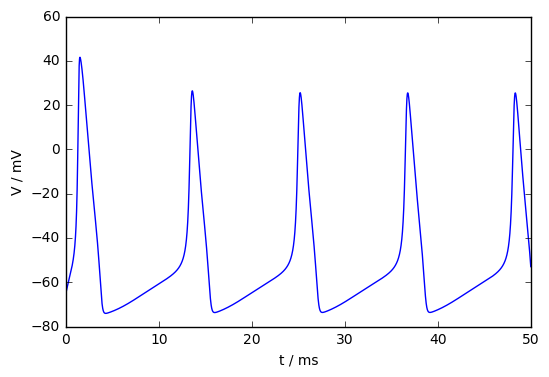

In [54]:
plt.plot(t, V)    
plt.xlabel(r't / ms')
plt.ylabel(r'V / mV')

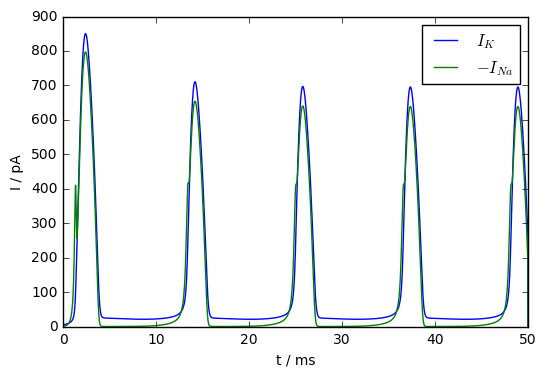

In [55]:
plt.plot(t, I_K, label='$I_K$')
plt.plot(t, -I_Na, label='$-I_{Na}$')
plt.xlabel(r't / ms')
plt.ylabel(r'I / pA')
plt.legend()

The Na current activates first and lets Na flow into the cell; this initiates the spike. The K current activates a bit later and counteracts the depolarization. Both currents have approximately the same strength.

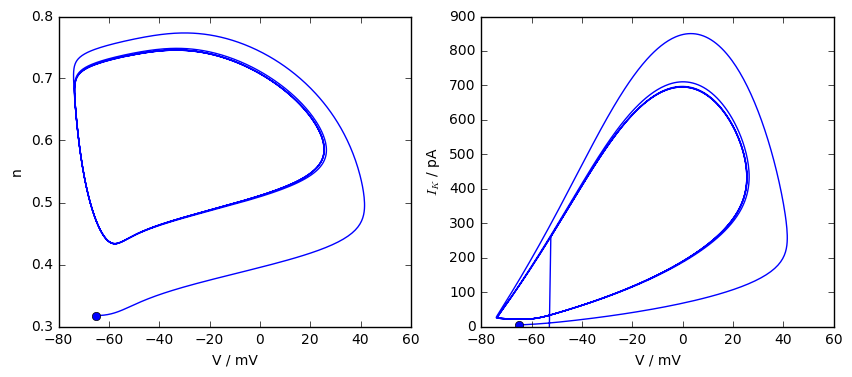

In [58]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(V, n)
plt.plot(V[0], n[0], 'bo')
plt.xlabel('V / mV')
plt.ylabel('n')

plt.subplot(122)
plt.plot(V, I_K)
plt.plot(V[0], I_K[0], 'bo')
plt.xlabel('V / mV')
plt.ylabel(r'$I_K$ / pA')

Both trajectories start at the blue dot and approximate a stable limit cycle as the neuron starts spiking.

#### d)

In [60]:
dt = 0.01
t = np.arange(0, 50, dt)

V = np.zeros_like(t)
n = np.zeros_like(t)
m = np.zeros_like(t)
h = np.zeros_like(t)

I_K = np.zeros_like(t)
I_Na = np.zeros_like(t)

V[0] = -65
m[0] = 0.0529
h[0] = 0.5961
n[0] = 0.3177

I_c = 20

for i in range(len(t)-1):
    I_c = -5 if t[i] < 5 else 0
    
    I_Na[i] = g_Na * m[i]**3 * h[i] * (V[i] - E_Na)
    I_K[i] = g_K * n[i]**4 * (V[i] - E_K)
    I_leak = g_leak * (V[i] - E_leak)
    
    V[i+1] = V[i] + dt * (-I_Na[i] - I_K[i] - I_leak + I_c) / C_m
    m[i+1] = m[i] + dt * (alpha_m(V[i]) * (1 - m[i]) - beta_m(V[i]) * m[i])
    h[i+1] = h[i] + dt * (alpha_h(V[i]) * (1 - h[i]) - beta_h(V[i]) * h[i])
    n[i+1] = n[i] + dt * (alpha_n(V[i]) * (1 - n[i]) - beta_n(V[i]) * n[i])

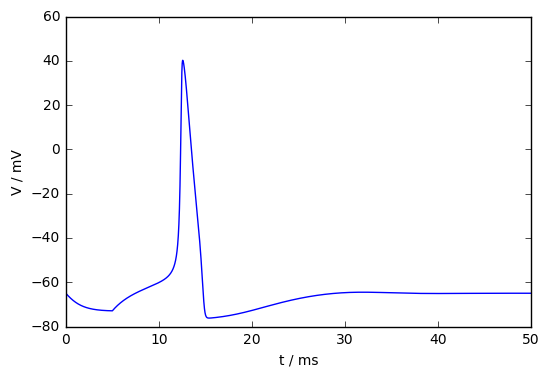

In [61]:
plt.plot(t, V)    
plt.xlabel(r't / ms')
plt.ylabel(r'V / mV')

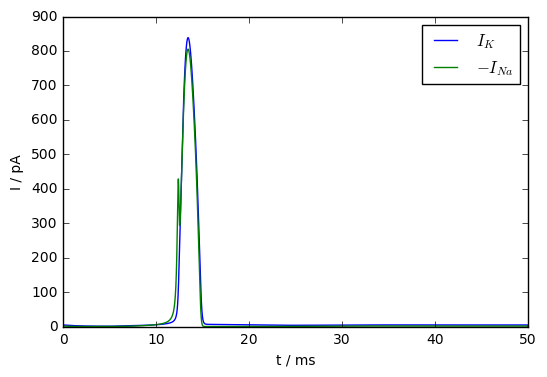

In [62]:
plt.plot(t, I_K, label='$I_K$')
plt.plot(t, -I_Na, label='$-I_{Na}$')
plt.xlabel(r't / ms')
plt.ylabel(r'I / pA')
plt.legend()

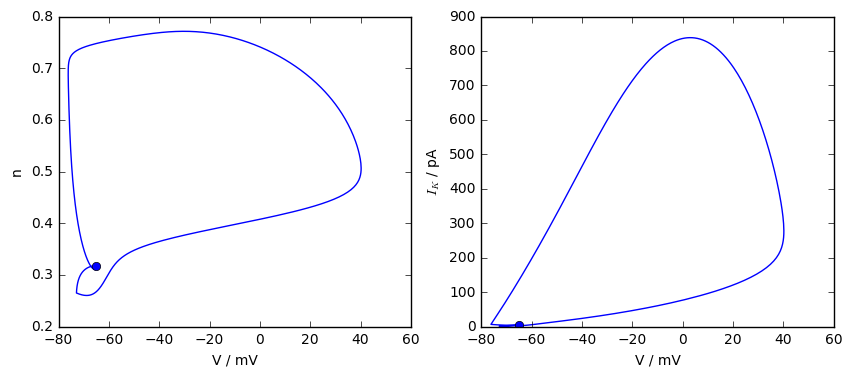

In [64]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(V, n)
plt.plot(V[0], n[0], 'bo')
plt.xlabel('V / mV')
plt.ylabel('n')

plt.subplot(122)
plt.plot(V, I_K)
plt.plot(V[0], I_K[0], 'bo')
plt.xlabel('V / mV')
plt.ylabel(r'$I_K$ / pA')

In response to the negative current pulse, the membrane hyperpolarizes (see also the movement of the trajectory to the left in the phase plane). When the stimulating current is reset to zero, the neuron fires a spike, even though the membrane potential has not reached threshold (a so-called rebound spike9. This can be explained by looking at the phase plane: The "trajectory" overshoots and performs one loop on a cycle before it reaches the equilibrium.